In [29]:
# Importing the Libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [31]:
# Loading the Dataset
data = pd.read_csv('UK_monthly_gdp.csv')

In [33]:
# Analyse the Top 5 rows of the Dataset
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


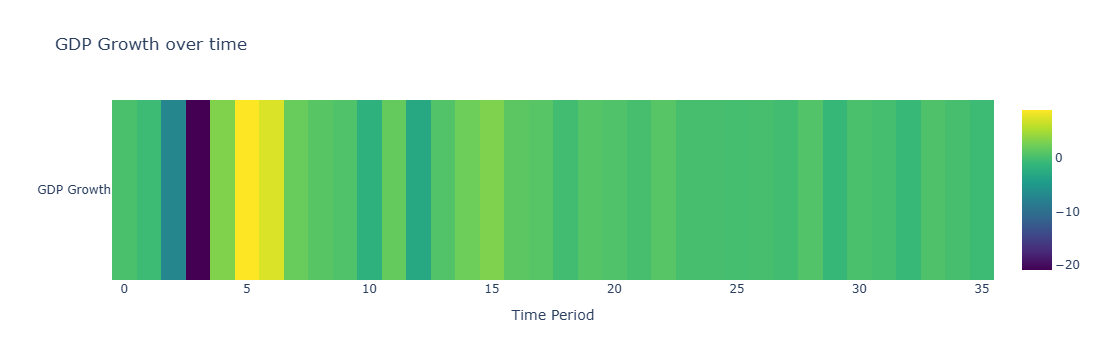

In [35]:
# Let’s have a look at the GDP growth over time

fig = go.Figure(data = go.Heatmap(z = [data['GDP Growth']],
                                 x = data.index,
                                 y = ['GDP Growth'],
                                 colorscale= 'Viridis'))

fig.update_layout(title = 'GDP Growth over time',
                 xaxis_title = 'Time Period',
                 yaxis_title = '')

fig.show()

In [37]:
# Convert monthly data to quarterly data using resample method
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('QE').mean()
print(quarterly_data.head())

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333


C:\Users\irt\AppData\Local\Temp\ipykernel_10712\2251551174.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





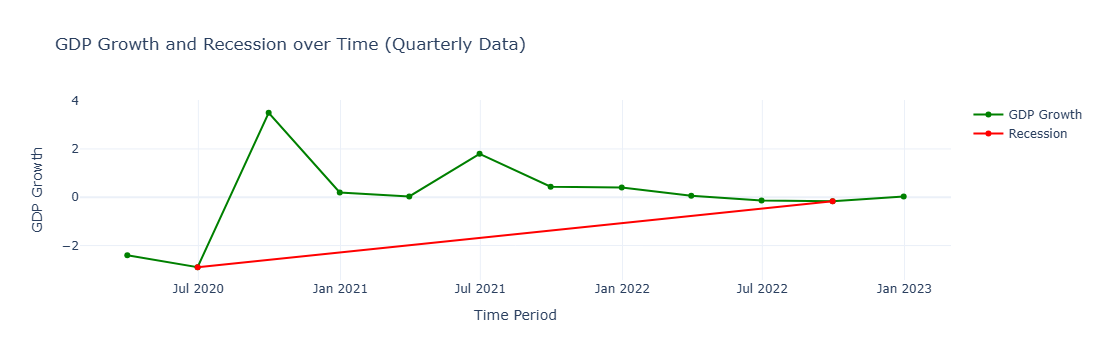

In [41]:
# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index, 
                         y=quarterly_data['GDP Growth'], 
                         name='GDP Growth', 
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index, 
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'], 
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

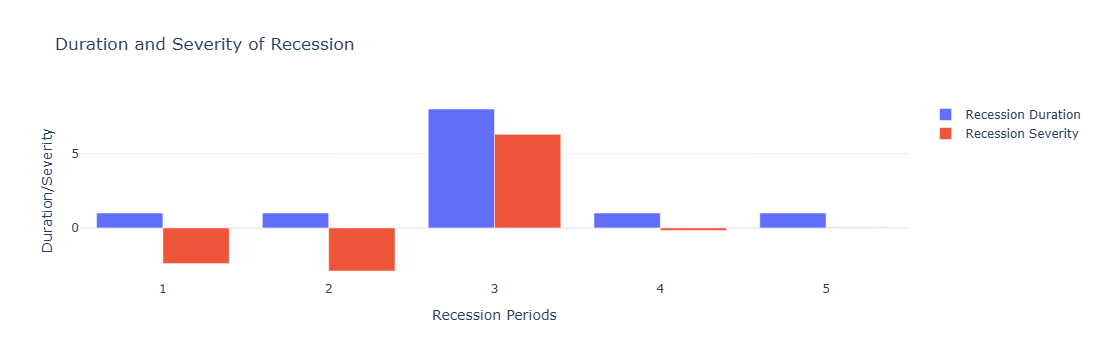

In [43]:
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()

##### Summary
A recession is an economic situation that arrives when the circulation of money in the economy is low for two consecutive quarters. Recession is calculated and analyzed according to the growth in GDP, the growth in the unemployment rate, and the growth in consumer spending rate.